<a href="https://colab.research.google.com/github/pererodin/RPS-Theory/blob/main/RPS_memory_selectivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

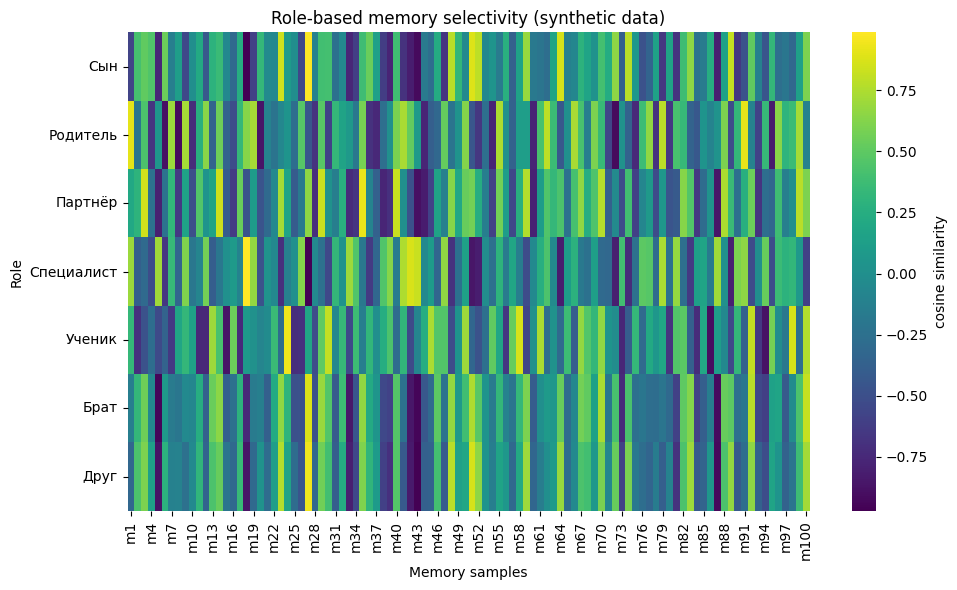

Сын: наиболее активируемые воспоминания → m27, m51, m64, m23, m89
Родитель: наиболее активируемые воспоминания → m91, m1, m62, m79, m55
Партнёр: наиболее активируемые воспоминания → m35, m3, m14, m29, m40
Специалист: наиболее активируемые воспоминания → m18, m42, m43, m41, m79
Ученик: наиболее активируемые воспоминания → m24, m58, m98, m30, m92
Брат: наиболее активируемые воспоминания → m27, m100, m92, m51, m70
Друг: наиболее активируемые воспоминания → m27, m51, m48, m23, m100


In [2]:
# 🧩 Synthetic modeling of role-based memory selectivity (RPS-Theory)
# Author: Stanislav Pererodin

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# --- 1. Define roles and their cognitive-emotional filters ---
roles = {
    "Сын":        [0.9, 0.2, 0.3, 0.8],  # высокая эмоция, низкий контроль, низкий риск, высокая социальность
    "Родитель":   [0.4, 0.9, 0.5, 0.6],
    "Партнёр":    [0.7, 0.6, 0.4, 0.9],
    "Специалист": [0.2, 0.8, 0.6, 0.3],
    "Ученик":     [0.6, 0.5, 0.7, 0.5],
    "Брат":       [0.7, 0.4, 0.5, 0.8],
    "Друг":       [0.8, 0.3, 0.4, 0.9],
}

role_df = pd.DataFrame(roles, index=["эмоция","контроль","риск","социальность"]).T

# --- 2. Generate 100 synthetic "memories" ---
np.random.seed(42)
memories = pd.DataFrame(
    np.random.rand(100, 4),
    columns=["эмоция","контроль","риск","социальность"]
)

# --- 3. Compute cosine similarity (role <-> memory) ---
scaler = StandardScaler()
mem_scaled = scaler.fit_transform(memories)
role_scaled = scaler.transform(role_df)

similarities = cosine_similarity(role_scaled, mem_scaled)
sim_df = pd.DataFrame(similarities, index=roles.keys(), columns=[f"m{i}" for i in range(1,101)])

# --- 4. Identify top memories for each role ---
top_memories = {role: sim_df.loc[role].nlargest(5).index.tolist() for role in roles.keys()}

# --- 5. Visualize role selectivity heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(sim_df, cmap="viridis", cbar_kws={"label": "cosine similarity"})
plt.title("Role-based memory selectivity (synthetic data)")
plt.xlabel("Memory samples")
plt.ylabel("Role")
plt.tight_layout()
plt.show()

# --- 6. Print strongest associations ---
for role, mems in top_memories.items():
    print(f"{role}: наиболее активируемые воспоминания → {', '.join(mems)}")
